In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Read Data

In [2]:
def read_data(images_file, label_file):

    train_images_file = open(images_file, 'rb')
    train_images_file.seek(4)
    num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
    train_images_file.seek(16)

    train_labels_file = open(label_file, 'rb')
    train_labels_file.seek(8)

    data_set = []
    for n in range(num_of_train_images):
        image = np.zeros((784, 1))
        for i in range(784):
            image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256

        label_value = int.from_bytes(train_labels_file.read(1), 'big')
        label = np.zeros((10, 1))
        label[label_value, 0] = 1

        data_set.append((image, label))

    return data_set

train_set = read_data('train-images.idx3-ubyte', 'train-labels.idx1-ubyte')
test_set = read_data('t10k-images.idx3-ubyte', 't10k-labels.idx1-ubyte')

label: 5


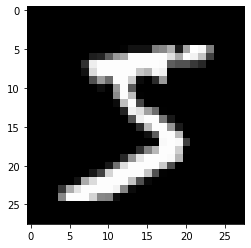

In [3]:
# Plotting an image

def show_image(img):
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')
    
show_image(train_set[0][0])
print(f"label: {np.argmax(train_set[0][1])}")
plt.show()

## Feed forward

In [4]:
layers_dim = (784, 16, 16, 10)

In [5]:
def init_W_b(layers_dim):
    n0, n1, n2, n3 = layers_dim
    # Initialize W from standard normal distribution
    W1 = np.random.randn(n1, n0)
    W2 = np.random.randn(n2, n1)
    W3 = np.random.randn(n3, n2)
    
    b1 = np.zeros((n1, 1))
    b2 = np.zeros((n2, 1))
    b3 = np.zeros((n3, 1))
    param = W1, W2, W3, b1, b2, b3 
    return param

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
def linear_activation_forward(A_prev, W, b):
    Z = np.dot(W, A_prev) + b
    A = sigmoid(Z)
    return Z, A

In [8]:
def feed_forward(A0, param):
    W1, W2, W3, b1, b2, b3 = param
    Z1, A1 = linear_activation_forward(A0, W1, b1)
    Z2, A2 = linear_activation_forward(A1, W2, b2)
    Z3, A3 = linear_activation_forward(A2, W3, b3)
    return A3, Z3, A2, Z2, A1, Z1

In [9]:
def calculate_accuracy(train_data, n, param):
    count = 0
    n = 100

    for train_data in train_set[:n]:
        A0 = train_data[0]
        A3, *_ = feed_forward(A0, param)

        predicted_number = np.argmax(A3)
        real_number = np.argmax(train_data[1])

        if predicted_number == real_number:
            count += 1

    return {count / n}

In [10]:
param = init_W_b(layers_dim)
print(f"Accuracy: {calculate_accuracy(train_set, 100, param)}")

Accuracy: {0.14}


## Back propagation


### 3rd layer
##### Weight
$$\displaystyle \frac{\partial Cost}{\partial w_{jk}^{(3)}} = \displaystyle \frac{\partial Cost}{\partial a_{j}^{(3)}} \times \displaystyle \frac{\partial a_{j}^{(3)}}{\partial z_{j}^{(3)}} \times \displaystyle \frac{\partial z_{j}^{(3)}}{\partial w_{jk}^{(3)}} $$

$$\displaystyle \frac{\partial Cost}{\partial w_{jk}^{(3)}} = 2(a_{j}^{(3)} - y_{j}) \times \sigma^{'}(z_{j}^{(3)})\times a_{k}^{(2)}$$

##### Bias
$$\displaystyle \frac{\partial Cost}{\partial b_{j}^{(3)}} = \displaystyle \frac{\partial Cost}{\partial a_{j}^{(3)}} \times \displaystyle \frac{\partial a_{j}^{(3)}}{\partial z_{j}^{(3)}} \times \displaystyle \frac{\partial z_{j}^{(3)}}{\partial b_{j}^{(3)}} $$

$$\displaystyle \frac{\partial Cost}{\partial b_{j}^{(3)}} = 2(a_{j}^{(3)} - y_{j}) \times \sigma^{'}(z_{j}^{(3)})\times 1$$

##### Activation
$$\displaystyle \frac{\partial Cost}{\partial a_{k}^{(2)}} = \sum_{j=0}^{9} \displaystyle \frac{\partial Cost}{\partial a_{j}^{(3)}} \times \displaystyle \frac{\partial a_{j}^{(3)}}{\partial z_{j}^{(3)}} \times \displaystyle \frac{\partial z_{j}^{(3)}}{\partial a_{k}^{(2)}} $$

$$\displaystyle \frac{\partial Cost}{\partial a_{k}^{(2)}} = \sum_{j=0}^{9} (2(a_{j}^{(3)} - y_{j}) \times \sigma^{'}(z_{j}^{(3)})\times w_{jk}^{(3)}) $$

### 2nd layer
##### Weight
$$\displaystyle \frac{\partial Cost}{\partial w_{km}^{(2)}} = \displaystyle \frac{\partial Cost}{\partial a_{k}^{(2)}} \times \displaystyle \frac{\partial a_{k}^{(2)}}{\partial z_{k}^{(2)}} \times \displaystyle \frac{\partial z_{k}^{(2)}}{\partial w_{km}^{(2)}} $$

$$\displaystyle \frac{\partial Cost}{\partial w_{km}^{(2)}} =  \displaystyle \frac{\partial Cost}{\partial a_{k}^{(2)}} \times \sigma^{'}(z_{k}^{(2)})\times a_{m}^{(1)}$$

##### Bias
$$\displaystyle \frac{\partial Cost}{\partial b_{k}^{(2)}} = \displaystyle \frac{\partial Cost}{\partial a_{k}^{(2)}} \times \displaystyle \frac{\partial a_{k}^{(2)}}{\partial z_{k}^{(2)}} \times \displaystyle \frac{\partial z_{k}^{(2)}}{\partial b_{k}^{(2)}} $$

$$\displaystyle \frac{\partial Cost}{\partial b_{k}^{(2)}} = \displaystyle \frac{\partial Cost}{\partial a_{k}^{(2)}} \times \sigma^{'}(z_{k}^{(2)})\times 1$$

##### Activation
$$\displaystyle \frac{\partial Cost}{\partial a_{m}^{(1)}} = \sum_{k=0}^{15} \displaystyle \frac{\partial Cost}{\partial a_{k}^{(2)}} \times \displaystyle \frac{\partial a_{k}^{(2)}}{\partial z_{k}^{(2)}} \times \displaystyle \frac{\partial z_{k}^{(2)}}{\partial a_{m}^{(1)}} $$

$$\displaystyle \frac{\partial Cost}{\partial a_{m}^{(1)}} = \sum_{k=0}^{15} (\displaystyle \frac{\partial Cost}{\partial a_{k}^{(2)}} \times \sigma^{'}(z_{k}^{(2)})\times w_{km}^{(2)}) $$

### first layer
##### Weight
$$\displaystyle \frac{\partial Cost}{\partial w_{mv}^{(1)}} = \displaystyle \frac{\partial Cost}{\partial a_{m}^{(1)}} \times \displaystyle \frac{\partial a_{m}^{(1)}}{\partial z_{m}^{(1)}} \times \displaystyle \frac{\partial z_{m}^{(1)}}{\partial w_{mv}^{(1)}} $$

$$\displaystyle \frac{\partial Cost}{\partial w_{mv}^{(1)}} =  \displaystyle \frac{\partial Cost}{\partial a_{m}^{(1)}} \times \sigma^{'}(z_{m}^{(1)})\times a_{v}^{(0)}$$

##### Bias
$$\displaystyle \frac{\partial Cost}{\partial b_{m}^{(1)}} = \displaystyle \frac{\partial Cost}{\partial a_{m}^{(1)}} \times \displaystyle \frac{\partial a_{m}^{(1)}}{\partial z_{m}^{(1)}} \times \displaystyle \frac{\partial z_{m}^{(1)}}{\partial b_{m}^{(1)}} $$

$$\displaystyle \frac{\partial Cost}{\partial b_{m}^{(1)}} = \displaystyle \frac{\partial Cost}{\partial a_{m}^{(1)}} \times \sigma^{'}(z_{m}^{(1)})\times 1$$

In [11]:
# derivative of sigmoid
def derivative_activation(x):
    return (sigmoid(x) * (1 - sigmoid(x)))

In [12]:
def update_grad_W_b_in_layer(layers_dim, activations, param, image, grads):
    n0, n1, n2, n3 = layers_dim
    A3, Z3, A2, Z2, A1, Z1 = activations
    W1, W2, W3, b1, b2, b3 = param
    grad_W1, grad_W2, grad_W3, grad_b1, grad_b2, grad_b3 = grads
    
    # layer 3
    for j in range(n3):
        for k in range(n2):
            grad_W3[j][k] += (2 * (A3[j][0] - image[1][j])) * derivative_activation(Z3[j][0]) * (A2[k][0])
            grad_b3[j][0] += (2 * (A3[j][0] - image[1][j])) * derivative_activation(Z3[j][0])

    grad_A2 = np.zeros((n2, 1))
    for k in range(n2):
        for j in range(n3):
            grad_A2[k][0] += (2 * (A3[j][0] - image[1][j])) * derivative_activation(Z3[j][0]) * W3[j][k]

    # layer 2
    for j in range(n2):
        for k in range(n1):
            grad_W2[j][k] += (grad_A2[j][0]) * derivative_activation(Z2[j][0]) * A1[k][0]
            grad_b2[j][0] += (grad_A2[j][0]) * derivative_activation(Z2[j][0]) 

    grad_A1 = np.zeros((n1, 1))
    for k in range(n1):
        for j in range(n2):
            grad_A1[k][0] += W2[j][k] * derivative_activation(Z2[j][0]) * grad_A2[j][0]

    # layer 1
    for j in range(n1):
        for k in range(n0):
            grad_W1[j][k] += grad_A1[j][0] * derivative_activation(Z1[j][0])  * image[0][k]
            grad_b1[j][0] += grad_A1[j][0] * derivative_activation(Z1[j][0])

    return grad_W3, grad_W2, grad_W1, grad_b3, grad_b2, grad_b1


In [13]:
# update W and b (end of batch)
def update_W_b(learning_rate, grad_W, W, grad_b, b, batch_size):
    W -= (learning_rate * (grad_W / batch_size))
    b -= (learning_rate * (grad_b / batch_size))
    return W, b

In [14]:
def calculate_cost(predicted, real):
    cost = 0
    for j in range(10):
        cost += np.power((predicted[j] - real[j]), 2)
    return cost

In [15]:
def init_grad_W_b(layers_dim):
    n0, n1, n2, n3 = layers_dim
    
    grad_W1 = np.zeros((n1, n0))
    grad_W2 = np.zeros((n2, n1))
    grad_W3 = np.zeros((n3, n2))

    grad_b1 = np.zeros((n1, 1))
    grad_b2 = np.zeros((n2, 1))
    grad_b3 = np.zeros((n3, 1))
    
    grads = (grad_W1, grad_W2, grad_W3, grad_b1, grad_b2, grad_b3)
    return grads

In [16]:
def start_learning_without_vectorization(layers_dim, dataset, epoch, batch_size, learning_rate, vectorized=False):
    param = init_W_b(layers_dim)
    W1, W2, W3, b1, b2, b3 = param
    total_cost_arr_in_batch = []
    for _ in range(epoch):
        # shuffle
        np.random.shuffle(train_set)

        for start in range(0, len(train_set), batch_size):
            # make batch
            stop = start + batch_size
            batch = train_set[start:stop]

            total_cost_in_batch = 0
            grads = init_grad_W_b(layers_dim)

            for image in batch:
                label = image[1]
                activations = feed_forward(image[0], param)
                A3, *_ = activations
                total_cost_in_batch += calculate_cost(A3, label)
                
                # backpropagation calculating
                if not vectorized:
                    grad_W3, grad_W2, grad_W1, grad_b3, grad_b2, grad_b1 = update_grad_W_b_in_layer(layers_dim, activations, param, image, grads)
                else:
                    grad_W3, grad_W2, grad_W1, grad_b3, grad_b2, grad_b1 = update_grad_W_b_in_layer_vectorized(layers_dim, activations, param, image, grads)
                    
            total_cost_arr_in_batch.append(total_cost_in_batch)
            
            # update Wi and bi (end of each batch)
            W3, b3 = update_W_b(learning_rate, grad_W3, W3, grad_b3, b3, batch_size)
            W2, b2 = update_W_b(learning_rate, grad_W2, W2, grad_b2, b2, batch_size)
            W1, b1 = update_W_b(learning_rate, grad_W1, W1, grad_b1, b1, batch_size)

    param = W1, W2, W3, b1, b2, b3
    return param, total_cost_arr_in_batch


In [17]:
# Hyperparameters
batch_size = 10
learning_rate = 1
epoch = 5

In [ ]:
param, total_cost_arr_in_batch = start_learning_without_vectorization(layers_dim, train_set[0: 100], epoch, batch_size, learning_rate)  # this W,b after learning
accuracy = calculate_accuracy(param, train_set[0: 100])
print("Accuracy :", accuracy)

## Vectorization

In [19]:
def update_grad_W_b_in_layer_vectorized(layers_dim, activations, param, image, grads):
    n0, n1, n2, n3 = layers_dim
    A3, Z3, A2, Z2, A1, Z1 = activations
    W1, W2, W3, b1, b2, b3 = param
    grad_W1, grad_W2, grad_W3, grad_b1, grad_b2, grad_b3 = grads
    
    grad_W3 += (2 * derivative_activation(Z3) * (A3 - image[1])) @ (np.transpose(A2))
    grad_b3 += (2 * derivative_activation(Z3) * (A3 - image[1]))
    grad_A2 = np.zeros((n_h2, 1))

    grad_A2 = np.transpose(W3) @ (2 * derivative_activation(Z3, activationType) * (A3 - image[1]))

    grad_W2 += (derivative_activation(Z2) * grad_A2) @ (np.transpose(A1))
    grad_b2 += (derivative_activation(Z2) * grad_A2)
    grad_A1 = np.zeros((n_h1, 1))
    grad_A1 = np.transpose(W2) @ (derivative_activation(Z2, activationType) * grad_A2)

    grad_W1 += (derivative_activation(Z1) * grad_A1) @ (np.transpose(image[0]))
    grad_b1 += (derivative_activation(Z1) * grad_A1)

    return grad_W3, grad_W2, grad_W1, grad_b3, grad_b2, grad_b1
